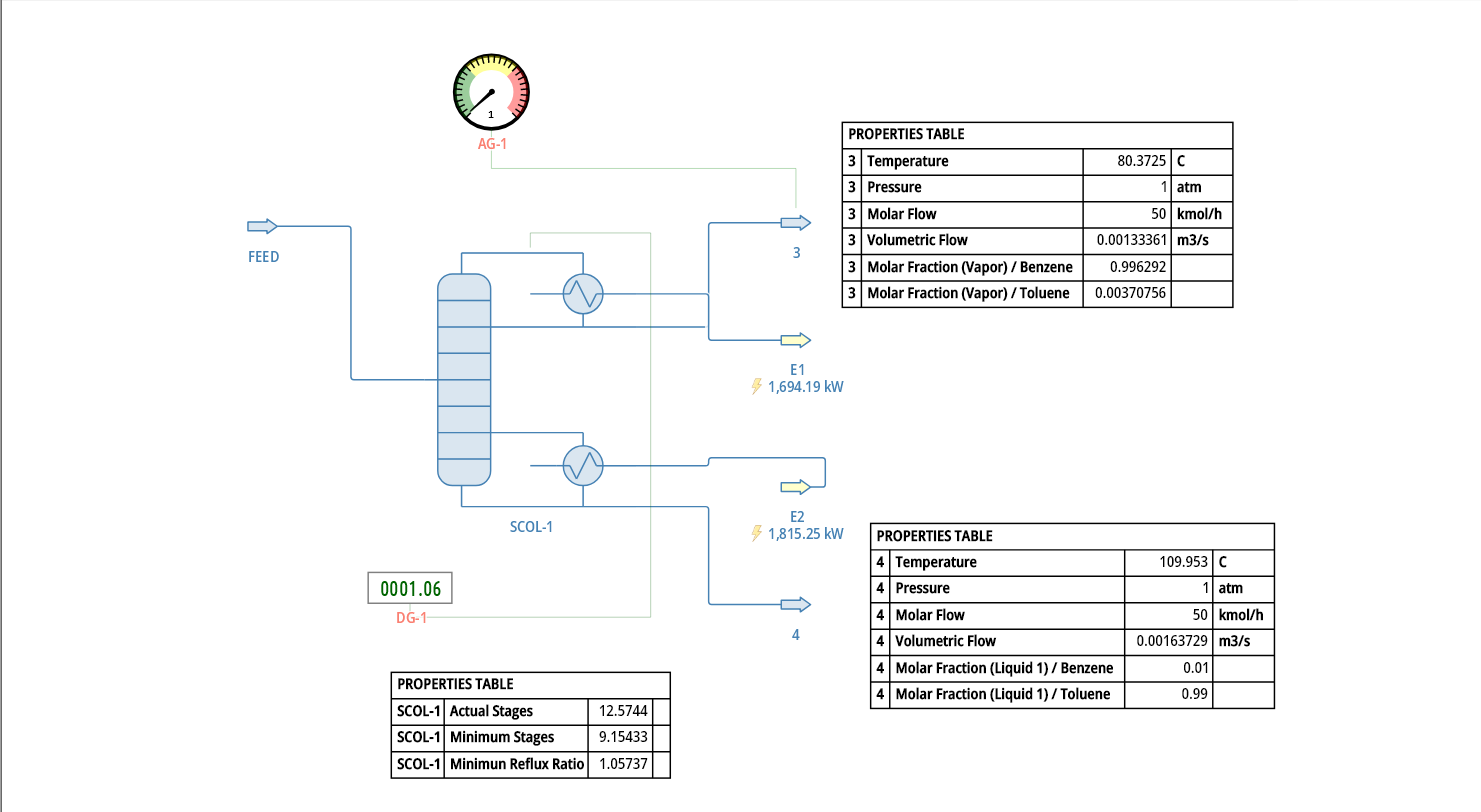

In [4]:
from IPython.display import display 
from PIL import Image
Basis_image = Image.open("C:/Users/VCI RG/OneDrive/Desktop/DWSIM simulation/5. Distillation/D-1.png")
display(Basis_image)

In [5]:
# To set up the environment by importing .NET and DWSIM libraries
import clr 
import System.IO
import System
import pythoncom
from System.IO import Directory, Path, File
from System import String, Environment


In [6]:
# Initialize COM and Setting up DWSIM path
pythoncom.CoInitialize()
dwSimPath = r"C:/Users/VCI RG/AppData/Local/DWSIM/"
clr.AddReference(dwSimPath + "CapeOpen.dll")
clr.AddReference(dwSimPath + "DWSIM.Automation.dll")
clr.AddReference(dwSimPath + "DWSIM.Interfaces.dll")
clr.AddReference(dwSimPath + "DWSIM.GlobalSettings.dll")
clr.AddReference(dwSimPath + "DWSIM.SharedClasses.dll")
clr.AddReference(dwSimPath + "DWSIM.Thermodynamics.dll")
clr.AddReference(dwSimPath + "DWSIM.UnitOperations.dll")
clr.AddReference(dwSimPath + "DWSIM.Inspector.dll")
clr.AddReference(dwSimPath + "System.Buffers.dll")

from DWSIM.Interfaces.Enums.GraphicObjects import ObjectType
from DWSIM.Thermodynamics import Streams , PropertyPackages
from DWSIM.UnitOperations import UnitOperations
from DWSIM.Automation import Automation3
from DWSIM.GlobalSettings import Settings 



In [7]:
# Sets a working directory in DWSIM folder
Directory.SetCurrentDirectory(dwSimPath)

In [8]:
# Loading the flowsheet

interf = Automation3()
fileNameToLoad = Path.Combine (r"C:/Users/VCI RG/OneDrive/Desktop/DWSIM simulation/5. Distillation/Distillation.dwxml")
sim = interf.LoadFlowsheet(fileNameToLoad)


In [9]:
#Accessing the distillation column
SC = sim.GetObject("SCOL-1")
SC = SC.GetAsObject()

# To print the specifications and parameters of Object that is SCOL-1 (Distillation column)
print(f"Type of Column: {SC.GetDisplayName()}")
print(f"Is Calculation performed : {SC.get_Calculated()}")
print(f"Light key: {SC.m_lightkey}")
print(f"Heavy key: {SC.m_heavykey}")
print(f"lightkey molarfrac : {SC.m_lightkeymolarfrac}")
print(f"heavykey molarfrac : {SC.m_heavykeymolarfrac}")
print(f"Reflux Ratio : {SC.m_refluxratio}")
print(f"Condenser Pressure :{SC.m_condenserpressure}")
print(f"Reboiler Pressure :{SC.m_boilerpressure}")
print(f"Minimum Reflux Ratio :{SC.m_Rmin}") # min reflux ratio required for the operation
print(f"Minimun number of stages :{SC.m_Nmin}") # minimum number of stages required
print(f"Actual number of Stages :{SC.m_N}") # prints actual number of stages
print(f"Optimal Number of stages: {SC.ofs}")
print(f"Liquid flow rate in stripping section: {SC.L_}") # liquid flow rate in stripping section
print(f"Liquid flow rate in rectifying section: {SC.L}")
print(f"Vapor flow rate in stripping section: {SC.V_}")
print(f"Vapor flow rate in rectifying section: {SC.V}")

Type of Column: Shortcut Column
Is Calculation performed : True
Light key: Benzene
Heavy key: Toluene
lightkey molarfrac : 0.01
heavykey molarfrac : 0.01
Reflux Ratio : 3.0
Condenser Pressure :101325.0
Reboiler Pressure :101325.0
Minimum Reflux Ratio :1.0573721612285092
Minimun number of stages :9.154330322895255
Actual number of Stages :12.574401667820927
Optimal Number of stages: 6.287200833910464
Liquid flow rate in stripping section: 61.33887242863901
Liquid flow rate in rectifying section: 35.24223485812974
Vapor flow rate in stripping section: 49.59146080926243
Vapor flow rate in rectifying section: 46.98964647750632


In [10]:
# For a range of flow rates

Feed = sim.GetObject("FEED")
Feed = Feed.GetAsObject()

## Properties to access

print(f"Inlet temperature:{Feed.GetTemperature()} K")
print(f"Pressure: {Feed.GetPressure()} Pa ")
print(f"Mass Flow: {Feed.GetMassFlow()} kg/s")

Inlet temperature:343.15 K
Pressure: 101325.0 Pa 
Mass Flow: 2.0 kg/s


## Simulating (Code) for varying mass flow rate

In [11]:

from tabulate import tabulate

Feed_Mass_Flow = float(input("Enter the initial flowrate (kg/s):"))
Settings.SolverMode = 0
Results = []



Enter the initial flowrate (kg/s): 3


## Code for getting increasing mass flow rate


In [12]:

for i in range(10):
    Feed.SetMassFlow(Feed_Mass_Flow)

    errors = interf.CalculateFlowsheet2(sim)

    Feed_Mass_Flow = Feed.GetMassFlow()
    Reflux_ratio = SC.m_refluxratio
    Actual_number_of_Stages = SC.m_N
    Optimal_Feed_Stage = SC.m_Nmin
    Stripping_Liquid = SC.L_
    Rectify_liquid = SC.L
    Stripping_Vapor = SC.V_
    Rectify_Vapor = SC.V
    Condenser_Duty = SC.m_Qc
    Reboiler_Duty = SC.m_Qb

    Results.append([ Feed_Mass_Flow, Reflux_ratio, Actual_number_of_Stages,Optimal_Feed_Stage,Stripping_Liquid,Rectify_liquid,Stripping_Vapor,Rectify_Vapor,Condenser_Duty,Reboiler_Duty])
    
    Feed_Mass_Flow += 1.0

    headers = [" Feed_Mass_Flow", "Reflux_ratio", "Actual_number_of_Stages","Optimal_Feed_Stage","Stripping_Liquid","Rectify_Liquid","Stripping_Vapor","Rectify_Vapor","Condenser_Duty","Reboiler_Duty"]

    print(tabulate(Results,headers=headers, tablefmt="grid"))
    
    
    

+-------------------+----------------+---------------------------+----------------------+--------------------+------------------+-------------------+-----------------+------------------+-----------------+
|    Feed_Mass_Flow |   Reflux_ratio |   Actual_number_of_Stages |   Optimal_Feed_Stage |   Stripping_Liquid |   Rectify_Liquid |   Stripping_Vapor |   Rectify_Vapor |   Condenser_Duty |   Reboiler_Duty |
+===================+================+===========================+======================+====================+==================+===================+=================+==================+=================+
|                 3 |              3 |                   12.5744 |              9.15433 |            92.0083 |          52.8634 |           74.3872 |         70.4845 |          2149.46 |         2303.04 |
+-------------------+----------------+---------------------------+----------------------+--------------------+------------------+-------------------+-----------------+-------------

In [13]:
import matplotlib.pyplot as plt
feed_Mass_flow_rates = [row[0] for row in Results]
Reflux_ratio = [row[1] for row in Results]
Actual_number_of_stages = [row[2] for row in Results]
Optimal_Feed_stage = [row[3] for row in Results]
Stripping_liquid =[row[4] for row in Results]
Rectify_liquid = [row[5] for row in Results]
Stripping_vapor = [row[6] for row in Results]
Rectify_vapor = [row[7] for row in Results]
Condenser_duty = [row[8] for row in Results]
Reboiler_duty = [row[9] for row in Results]

## Plotting Graph

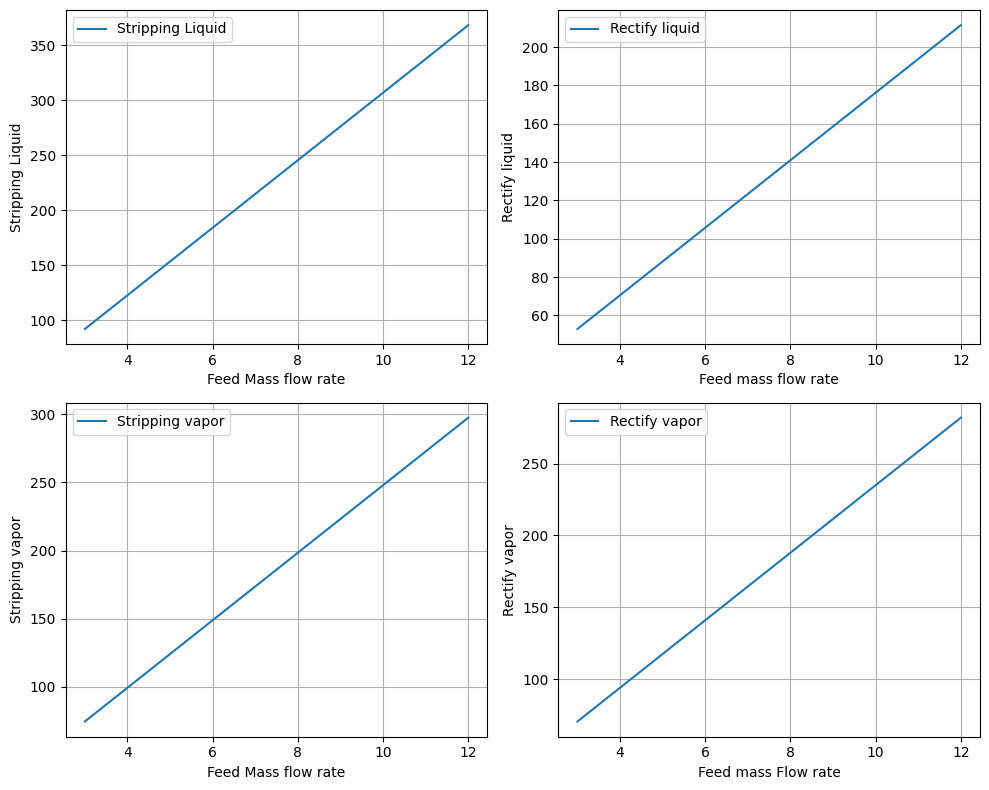

In [25]:
fig,axs = plt.subplots(2,2,figsize=(10,8))

axs[0,0].plot(feed_Mass_flow_rates,Stripping_liquid, label="Stripping Liquid")
axs[0,0].set_xlabel("Feed Mass flow rate")
axs[0,0].set_ylabel("Stripping Liquid")
axs[0,0].legend()
axs[0,0].grid()

axs[0,1].plot(feed_Mass_flow_rates,Rectify_liquid, label = "Rectify liquid")
axs[0,1].set_xlabel("Feed mass flow rate")
axs[0,1].set_ylabel("Rectify liquid")
axs[0,1].legend()
axs[0,1].grid()

axs[1,0].plot(feed_Mass_flow_rates,Stripping_vapor, label = "Stripping vapor")
axs[1,0].set_xlabel("Feed Mass flow rate")
axs[1,0].set_ylabel("Stripping vapor")
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].plot(feed_Mass_flow_rates,Rectify_vapor, label = "Rectify vapor")
axs[1,1].set_xlabel("Feed mass Flow rate")
axs[1,1].set_ylabel("Rectify vapor")
axs[1,1].legend()
axs[1,1].grid()

plt.tight_layout()
plt.show()


## Condenser duty, Reboiler Duty vs Feed flow rate

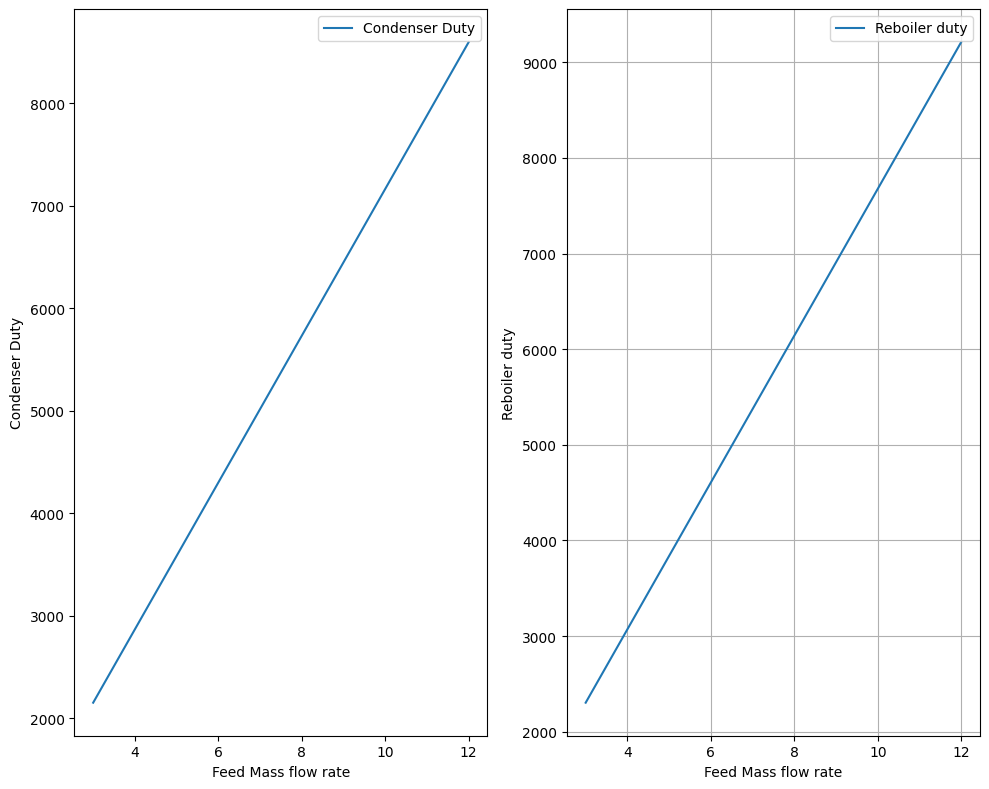

In [32]:
fig,axs = plt.subplots(1,2, figsize= (10,8))
axs[0].plot(feed_Mass_flow_rates,Condenser_duty, label = "Condenser Duty")
axs[0].set_xlabel("Feed Mass flow rate")
axs[0].set_ylabel("Condenser Duty")
axs[0].legend()
axs[0].grid

axs[1].plot(feed_Mass_flow_rates,Reboiler_duty, label = "Reboiler duty")
axs[1].set_xlabel("Feed Mass flow rate")
axs[1].set_ylabel("Reboiler duty")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()